## Q3. Using the Mauna Lua CO2 dataset (monthly) perform forecasting using an MLP and compare the results with that of MA (Moving Average) and ARMA (Auto Regressive Moving Average)  models. Main setting: use previous “K” readings to predict next “T” reading.  

# Imports and Installations

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Loading and pre processing the data

In [2]:
data = pd.read_csv('/home/isha.narang/machine_learning/co2_mm_mlo.csv', skiprows=40)

In [3]:
data

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
787,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
788,2023,11,2023.8750,420.46,422.46,21,0.91,0.38
789,2023,12,2023.9583,421.86,422.58,20,0.68,0.29
790,2024,1,2024.0417,422.80,422.45,27,0.73,0.27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            792 non-null    int64  
 1   month           792 non-null    int64  
 2   decimal date    792 non-null    float64
 3   average         792 non-null    float64
 4   deseasonalized  792 non-null    float64
 5   ndays           792 non-null    int64  
 6   sdev            792 non-null    float64
 7   unc             792 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 49.6 KB


In [5]:
data['Date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))
data.set_index('Date', inplace=True)
print(data)


            year  month  decimal date  average  deseasonalized  ndays  sdev  \
Date                                                                          
1958-03-01  1958      3     1958.2027   315.70          314.43     -1 -9.99   
1958-04-01  1958      4     1958.2877   317.45          315.16     -1 -9.99   
1958-05-01  1958      5     1958.3699   317.51          314.71     -1 -9.99   
1958-06-01  1958      6     1958.4548   317.24          315.14     -1 -9.99   
1958-07-01  1958      7     1958.5370   315.86          315.18     -1 -9.99   
...          ...    ...           ...      ...             ...    ...   ...   
2023-10-01  2023     10     2023.7917   418.82          422.12     27  0.47   
2023-11-01  2023     11     2023.8750   420.46          422.46     21  0.91   
2023-12-01  2023     12     2023.9583   421.86          422.58     20  0.68   
2024-01-01  2024      1     2024.0417   422.80          422.45     27  0.73   
2024-02-01  2024      2     2024.1250   424.55      

# visualizing the data

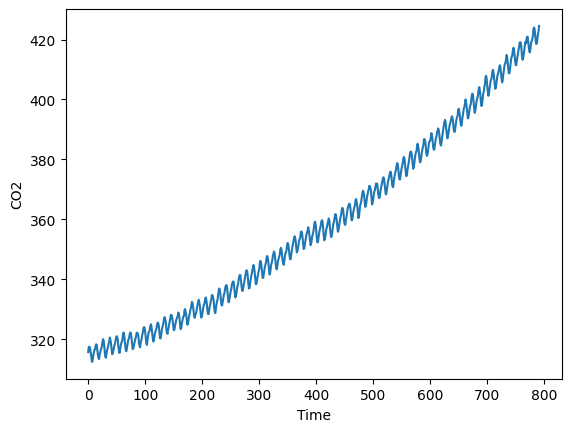

In [6]:
X = np.array(range(len(data)))
y = data.average.values
plt.xlabel('Time')
plt.ylabel('CO2')
plt.plot(X, y)

# Train-Test Split


In [7]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [8]:
test_data

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
Date,,,,,,,,
2010-12-01,2010,12,2010.9583,389.99,390.80,29,0.47,0.17
2011-01-01,2011,1,2011.0417,391.50,391.19,29,0.88,0.31
2011-02-01,2011,2,2011.1250,392.05,391.12,28,0.47,0.17
2011-03-01,2011,3,2011.2083,392.80,391.27,29,0.97,0.35
2011-04-01,2011,4,2011.2917,393.44,390.83,28,0.73,0.26
...,...,...,...,...,...,...,...,...
2023-10-01,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
2023-11-01,2023,11,2023.8750,420.46,422.46,21,0.91,0.38
2023-12-01,2023,12,2023.9583,421.86,422.58,20,0.68,0.29


In [9]:
train_data

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
Date,,,,,,,,
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
2010-07-01,2010,7,2010.5417,390.41,389.93,29,0.47,0.17
2010-08-01,2010,8,2010.6250,388.54,390.21,26,0.41,0.16
2010-09-01,2010,9,2010.7083,387.03,390.32,29,0.55,0.19


# MA Model

In [10]:

def moving_average(data, k):
    return data['average'].rolling(window=k).mean().dropna()

In [11]:
y_hat = moving_average(train_data, 3)

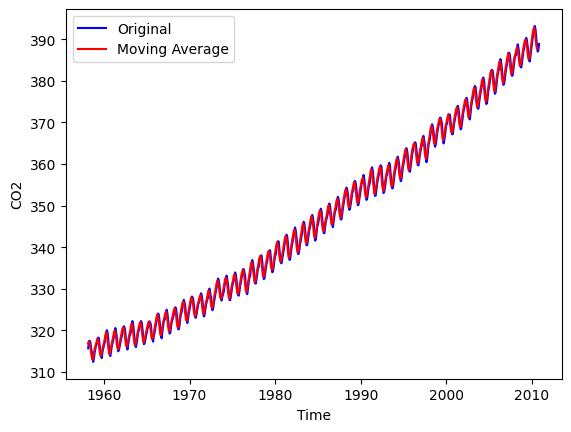

In [12]:
# Trim the longer array to match the length of the shorter one
x = train_data.index[:631]
y = y_hat.values[:631]
plt.plot(train_data.index, train_data['average'], color='blue', label='Original')
plt.plot(x, y, color='red', label='Moving Average')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.legend()


# ARMA Model

In [14]:
def ARMA_model(train_data, test_data, p, q):
    history = [x for x in train_data['average']]
    predictions = []
    for t in range(len(test_data)):
        model = ARIMA(history, order=(p,0,q))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test_data['average'][t]
        history.append(obs)
    return predictions

# MLP Model

In [15]:

def MLP_model(train_data, test_data, k):
    X_train, y_train = [], []
    for i in range(len(train_data)-k):
        X_train.append(train_data.iloc[i:i+k]['average'].values)
        y_train.append(train_data.iloc[i+k]['average'])
    X_test = [test_data.iloc[i:i+k]['average'].values for i in range(len(test_data)-k)]
    y_test = test_data.iloc[k:]['average'].values

    model = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

### Checking accuracy on train data through plot

In [16]:
def MLP_model_train(train_data, test_data, k):
    X_train, y_train = [], []
    for i in range(len(train_data)-k):
        X_train.append(train_data.iloc[i:i+k]['average'].values)
        y_train.append(train_data.iloc[i+k]['average'])
    X_test = [test_data.iloc[i:i+k]['average'].values for i in range(len(test_data)-k)]
    y_test = test_data.iloc[k:]['average'].values

    model = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    return predictions

In [17]:
predictions_train = MLP_model_train(train_data, test_data, 3)

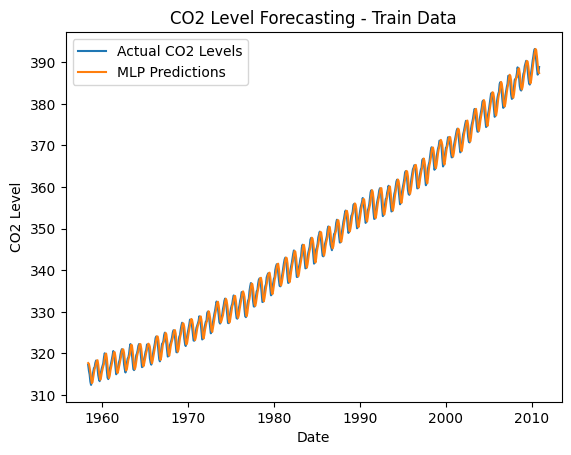

In [19]:
K = 3
plt.plot(train_data.index[K:], train_data['average'][K:], label='Actual CO2 Levels')
plt.plot(train_data.index[K:], predictions_train[:len(train_data) - K], label='MLP Predictions')

plt.title('CO2 Level Forecasting - Train Data')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()


# Finding the predictions

In [20]:
k = 3
p = 2
q = 1

In [22]:
ma_predictions = moving_average(test_data, k)
arma_predictions = ARMA_model(train_data, test_data, p, q)
mlp_predictions = MLP_model(train_data, test_data, k)

In [23]:
print("Length of ma_predictions:", len(ma_predictions))
print("Length of arma_predictions:", len(arma_predictions))
print("Length of mlp_predictions:", len(mlp_predictions))
print("Length of actual values:", len(test_data['average'][k:]))
print("Length of test data:", len(test_data))

Length of ma_predictions: 157
Length of arma_predictions: 159
Length of mlp_predictions: 156
Length of actual values: 156
Length of test data: 159


# Comparing MSEs

In [24]:
# Comparing the results
min_length = min(len(ma_predictions), len(arma_predictions), len(mlp_predictions))
ma_mse = mean_squared_error(test_data['average'][:min_length], ma_predictions[:min_length])
arma_mse = mean_squared_error(test_data['average'][:min_length], arma_predictions[:min_length])
mlp_mse = mean_squared_error(test_data['average'][:min_length], mlp_predictions[:min_length])

print("MA Model MSE:", ma_mse)
print("ARMA Model MSE:", arma_mse)
print("MLP Model MSE:", mlp_mse)


MA Model MSE: 1.5539545584045573
ARMA Model MSE: 0.8953852757760763
MLP Model MSE: 0.9953531259783196


# Visualizing the differences and similarities

In [25]:
K =3 

# on test set

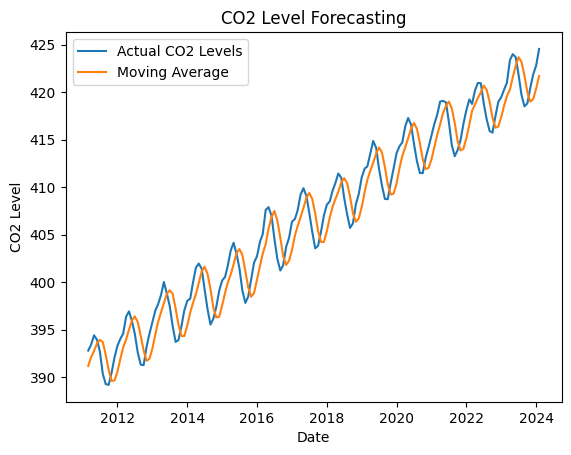

In [26]:
plt.plot(test_data.index[K:], test_data['average'][K:], label='Actual CO2 Levels')
plt.plot(test_data.index[K:], ma_predictions[:len(test_data) - K], label='Moving Average')

plt.title('CO2 Level Forecasting')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()


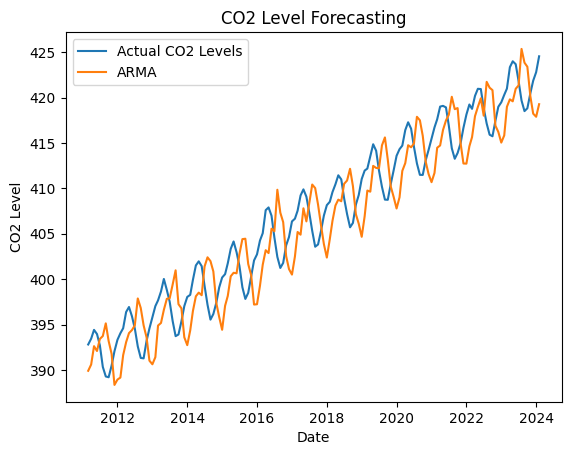

In [27]:
plt.plot(test_data.index[K:], test_data['average'][K:], label='Actual CO2 Levels')
plt.plot(test_data.index[K:], arma_predictions[:len(test_data) - K], label='ARMA')


plt.title('CO2 Level Forecasting')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()


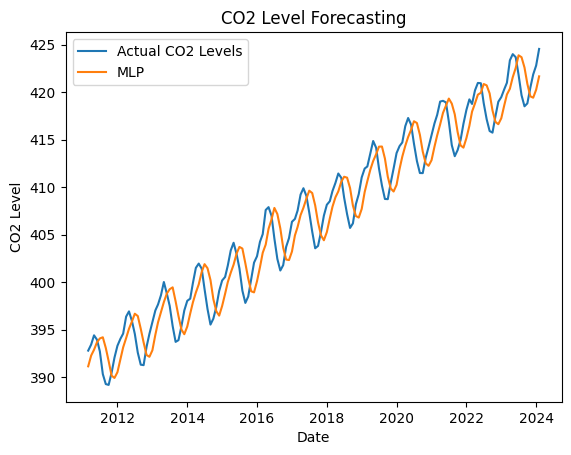

In [28]:
plt.plot(test_data.index[K:], test_data['average'][K:], label='Actual CO2 Levels')
plt.plot(test_data.index[K:], mlp_predictions[:len(test_data) - K], label='MLP')

plt.title('CO2 Level Forecasting')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()

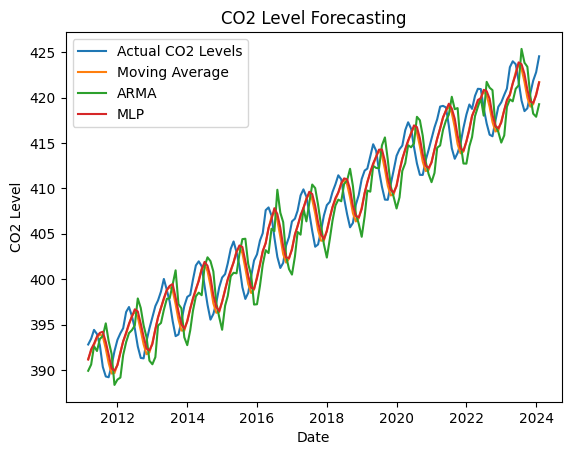

In [29]:
plt.plot(test_data.index[K:], test_data['average'][K:], label='Actual CO2 Levels')
plt.plot(test_data.index[K:], ma_predictions[:len(test_data) - K], label='Moving Average')
plt.plot(test_data.index[K:], arma_predictions[:len(test_data) - K], label='ARMA')
plt.plot(test_data.index[K:], mlp_predictions[:len(test_data) - K], label='MLP')

plt.title('CO2 Level Forecasting')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()